# Introduction to Statistics 
Many statistical tools and techniques used in data analysis are based on probability, a measures on a scale from 0 to 1 the likelihood of an event occurence (0 the event never occurs, 1, the event always occurs.). 

Variables in the columns of a data set can be thought of as random variables: their values varying due to chance. 

The distribution of the outcomes (values) of a random variable is described using probability distribution (function). In statistics, there are several common probability distributions, corresponding to various "shapes". The most commonly used to model real life random events are the Uniform, Normal, Binomial, Exponential, Poisson, and Lognormal distributions.


#### About this Notebook
This notebook presents several common probability distributions and how to work with them in Python.


## The Uniform Distribution
The uniform distribution is a probability distribution where each value within a certain range is equally likely to occur and values outside of the range never occur.



### Importing Needed packages
Let's generate some uniform data and plot a density curve using the scipy.stats library


In [1]:
# Uncomment next command if you need to install a missing module
#!pip install statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats  as stats
%matplotlib inline

## Uniform Distribution
The uniform distribution is a probability distribution where each value within a certain range is equally likely to occur and values outside of the range never occur. If we make a density plot of a uniform distribution, it appears flat because no value is any more likely (and hence has any more density) than another.

Many useful functions for working with probability distributions in Python are contained in the `scipy.stats` library. Let's generate some uniform data and plot a density curve:

<AxesSubplot:ylabel='Density'>

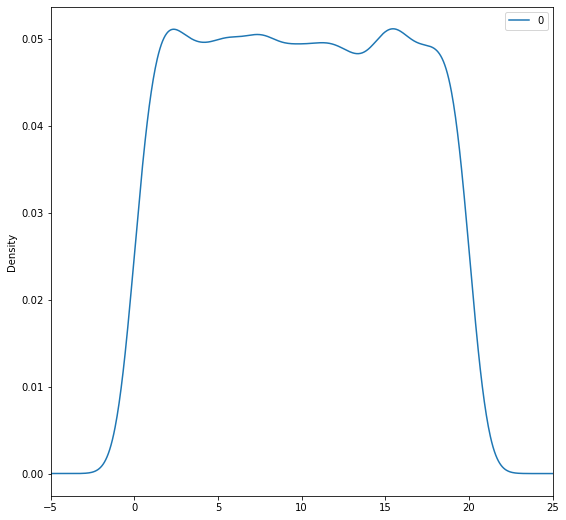

In [2]:
uniform_data = stats.uniform.rvs(size  = 10000,  # Generate 10000 numbers
                                 loc   = 0,      # From 0 
                                 scale = 20)     # To 20

pd.DataFrame(uniform_data).plot(kind   = "density",  # Plot the distribution
                               figsize = (9,9),
                               xlim    = (-5,25))

### Notes:

The plot above is an approximation of the theoretical uniform distribution because it is based on a sample of observations: we generated 10,000 data points from a uniform distribution spanning the range 0 to 20. 

In the density plot, we see that the density of sample data is almost level, i.e., all values have the same probability of occurring. 

Note: the area under a probability density curve is always equal to 1.

More useful scipy functions:

- **stats.distribution.rvs()** generates random numbers from the specified distribution. The arguments to `rvs()` vary depending on the type of distribution considered, e.g., the starting and ending points and the sample size for a uniform distribution.

- ** stats.distribution.cdf()** returns the probability that an observation drawn from a distribution is below a specified value (a.k.a., the cumulative distribution function) calculated as the area under the distribution's density curve to the left of the specified value (on the $x$ axis). For example, in the uniform distribution above, there is a 25% chance that an observation will be in the range 0 to 5 and a 75% chance it will fall in the range 5 to 20. We can confirm this with `cdf()`:

In [3]:
stats.uniform.cdf(x     = 5,       # quantile to check
                  loc   = 0,       # start value of the distribution
                  scale = 20)      # end value of the distribution 


0.25

- **stats.distribution.ppf()** is the inverse of `cdf()`: it returns the quantile ($x$ axis cutoff value) associated with a given probability. For example, to get the cutoff value for which there is a 20% chance of drawing an observation below that value, we can use `ppf()`:

In [4]:
stats.uniform.ppf(  q   = 0.2,     # Probability cutoff
                  loc   = 0,       # start value of the distribution
                  scale = 20)      # end value of the distribution 

4.0

- **stats.distribution.pdf()** returns the probability density (height of the distribution) at a given $x$ value. Note that all values within the range of a uniform distribution have the same probability density and all values outside the range of the distribution have a probability density of 0.

Probability distribution functions in `scipy` also support `median()`, `mean()`, `var()` and `std()`.

In [5]:
for x in range(-2,24,4):
    print("Density at x value " + str(x))
    print( stats.uniform.pdf(x, loc = 0, scale = 20) )   


Density at x value -2
0.0
Density at x value 2
0.05
Density at x value 6
0.05
Density at x value 10
0.05
Density at x value 14
0.05
Density at x value 18
0.05
Density at x value 22
0.0


### Generating Random Numbers and Setting The Seed
To generate random real numbers in a range with equal probability one can draw numbers from a uniform distribution using the `stats.distribution.rvs()` described above.

Python also has with a library called "random" which comes equiped with various operations that involve randomization. 

In [6]:
import random
print(random.randint(0,10))     # Get a random integer in the specified range
print(random.choice([2,4,6,9])) # Get a random element from a sequence

9
6


In [7]:
print(random.random())          # Get a real number between 0 and 1

0.5961904474382315


In [8]:
print(random.uniform(0,10))     # Get a real in the specified range

3.894746110160331


## Setting the Seed
Regardless of the method used to generate random numbers, the result of a random process can differ from one run to the next. If having different results each time is not desired, e.g., if results need to be reproduced exactly, one can ensure that the results are the same each time by setting the random number generator's seed value to a specific figure. `random.seed()` allows us to set the random number generator's seed.


Notice that we generate the exact same numbers with both calls to `random.uniform()` because the same seed is set before each call.  This reproducibility illustrates the fact that these random numbers aren't truly random, but rather "pseudorandom".

Many Python library functions that use randomness have an optional random seed argument built in, e.g.,  the `rvs()` function has an argument `random_state`, which allows us to set the seed.

Note: there is a separate internal seed from the `numpy` library, which can be set with `numpy.random.seed()` when using functions from `numpy` and libraries built on top of it such as `pandas` and `scipy`.


In [9]:
random.seed(10)           # Set the seed to 12 

print([random.uniform(0,20) for x in range(4)])

random.seed(10)            # Set the seed to the same value

print([random.uniform(0,20) for x in range(4)])

[11.42805189379827, 8.577781093502292, 11.561826022689408, 4.121964642790035]
[11.42805189379827, 8.577781093502292, 11.561826022689408, 4.121964642790035]


## Normal Distribution
The normal (or Gaussian distribution) is a continuous probability distribution with a bell-shaped curve and is characterized by its center point (mean) and spread (standard deviation). Most observations from a normal distribution lie close to the mean, i.e., about 68% of the data lies within 1 standard deviation of the mean, 95% lies within 2 standard deviations and 99.7% within 3 standard deviations.

Note that many common statistical tests assume distributions are normal. (In the `scipy` module the normal distribution is referred to as `norm`.) 


In [10]:
prob_under_minus1 = stats.norm.cdf(x     = -1,  
                                   loc   = 0,               
                                   scale = 1)     

prob_over_1 = 1 - stats.norm.cdf(x= 1,  
                                loc = 0,               
                                scale= 1) 

between_prob = 1 - (prob_under_minus1 + prob_over_1)

print(prob_under_minus1, prob_over_1, between_prob)

0.15865525393145707 0.15865525393145707 0.6826894921370859


The figures above show that approximately 16% of the data in a normal distribution with mean 0 and standard deviation 1 is below -1, 16% is above 1 and 68% is between -1 and 1. Let's plot the normal distribution:

Text(1.4, 0.03, '0.159')

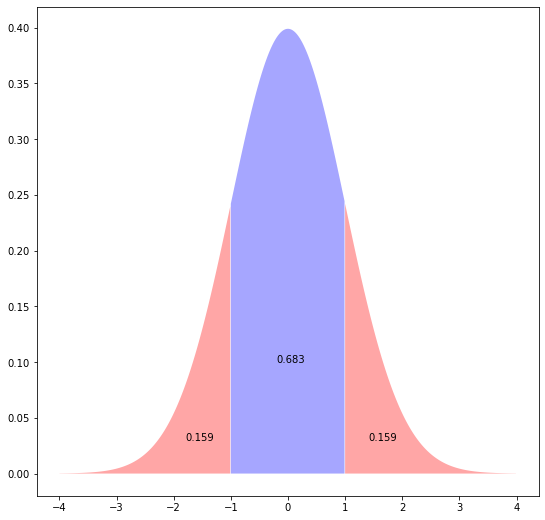

In [11]:
# Plot Normal distribution areas

plt.rcParams["figure.figsize"] = (9,9)
                                  
plt.fill_between(x=np.arange(-4,-1,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01), 
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1,  s= round(between_prob,3))
plt.text(x=1.4,  y=0.03, s= round(prob_over_1,3))

The plot above shows the bell shape of the normal distribution as well as the area below, above and within one standard deviation of the mean. One can also check the quantiles of a normal distribution with `stats.norm.ppf()`:

In [12]:
print( stats.norm.ppf(q=0.025) ) # Find the quantile for the 2.5% cutoff

print( stats.norm.ppf(q=0.975) ) # Find the quantile for the 97.5% cutoff

-1.9599639845400545
1.959963984540054


The figures above show that approximately 5% of the data is further than 2 standard deviations from the mean.

## Binomial Distribution
The binomial distribution is a discrete probability distribution that models the outcomes of a given number of random trails of some experiment or event. The binomial distribution has two parameters: the probability of success in a trial and the number of trials. The binomial distribution represents the likelihood to achieve a given number of successes in $n$ trials of an experiment. We could model flipping a fair coin 10 times with a binomial distribution where the number of trials is set to 10 and the probability of success is set to 0.5.

The `scipy` name for the binomial is `binom`. 


col_0   0    1    2     3     4     5     6     7    8    9   10
row_0                                                           
counts  10  101  455  1137  2054  2505  2025  1152  439  109  13


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

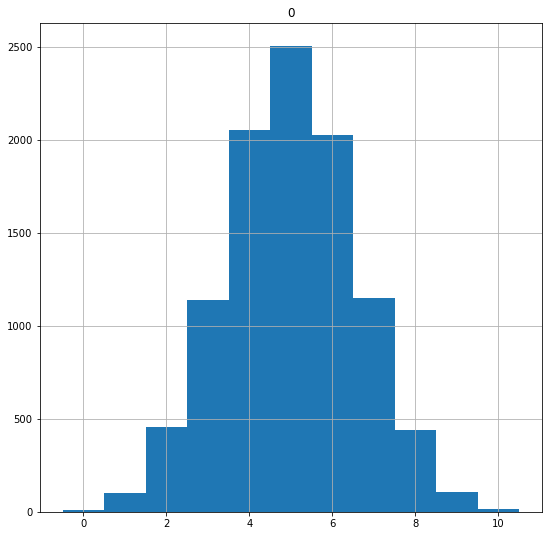

In [13]:
fair_coin_flips = stats.binom.rvs(n=10,        # Number of flips per trial
                                  p=0.5,       # Success probability
                                  size=10000)  # Number of trials

print( pd.crosstab(index="counts", columns= fair_coin_flips))

pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11)

The binomial distribution is discrete and can be summarized with a frequency table (and  a histogram). The histogram shows us that a binomial distribution with a 50% probability of success is roughly symmetric, but this is not the case in general.

col_0   3   4    5    6     7     8     9     10
row_0                                           
counts   7  64  260  837  1988  3031  2732  1081


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

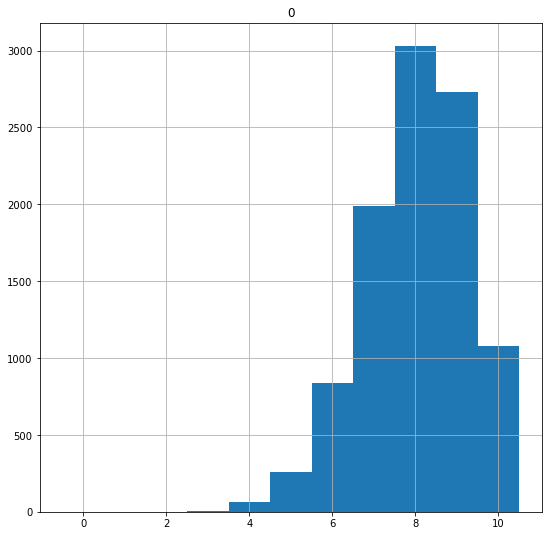

In [14]:
biased_coin_flips = stats.binom.rvs(n=10,      # Number of flips per trial
                                  p=0.8,       # Success probability
                                  size=10000)  # Number of trials

# Print table of counts
print( pd.crosstab(index="counts", columns= biased_coin_flips))

# Plot histogram
pd.DataFrame(biased_coin_flips).hist(range=(-0.5,10.5), bins=11)

In [15]:
#cdf() check the probability of achieving a number of successes within a certain range

print(stats.binom.cdf(k=5,        # Probability of k = 5 successes or less
                      n=10,       # With 10 flips
                      p=0.8))     # And success probability 0.8

print(1 - stats.binom.cdf(k=8,    # Probability of k = 9 successes or more
                          n=10,   # With 10 flips
                          p=0.8)) # And success probability 0.8

0.032793497599999964
0.37580963840000003


For continuous probability density functions, we can use `pdf()` to check the probability density at a given $x$ value. For discrete distributions like the binomial, we can use `stats.distribution.pmf()`, the probability mass function to check the proportion of observations at given number of successes $k$.

In [16]:
print(stats.binom.pmf(k=5,        # Probability of k = 5 successes
                      n=10,       # With 10 flips
                      p=0.5))     # And success probability 0.5

print(stats.binom.pmf(k=8,        # Probability of k = 8 successes
                      n=10,       # With 10 flips
                      p=0.8))     # And success probability 0.8

0.24609375000000025
0.301989888


## Geometric and Exponential Distributions
The geometric distribution is discrete and models the number of trials it takes to achieve a success in repeated experiments with a given probability of success. The exponential distribution is continuous and models the amount of time before an event occurs given a certain occurrence rate.
The `scipy` nickname for the geometric distribution is "geom". Below we model the number of trials it takes to get a success (heads) when flipping a fair coin:


col_0     1     2     3    4    5    6   7   8   9   10  11  12  13  14  15
row_0                                                                      
counts  4955  2532  1240  664  314  163  69  26  23   5   3   2   2   1   1


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

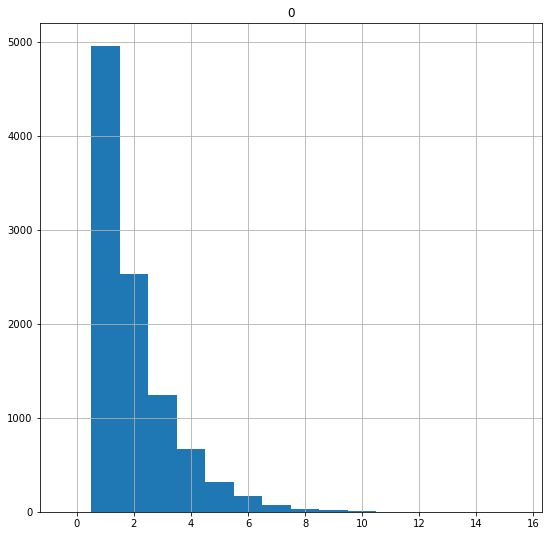

In [17]:
random.seed(12)

flips_till_heads = stats.geom.rvs(size=10000,  # Generate geometric data
                                  p=0.5)       # With success prob 0.5

# Print table of counts
print( pd.crosstab(index="counts", columns= flips_till_heads))

# Plot histogram
pd.DataFrame(flips_till_heads).hist(range=(-0.5,max(flips_till_heads)+0.5)
                                    , bins=max(flips_till_heads)+1)

In the 10,000 trails generated, the longest it took to get a heads was 13 flips. We can use `cdf()` to check the probability of needing 3 flips or more to get a success:


In [18]:
first_three = stats.geom.cdf(k=3,   # Prob of success in first 5 flips
                           p=0.5)

1 - first_three

0.125

In [19]:
#Use pmf() to check the probability of seeing a specific number of flips before a successes
stats.geom.pmf(k=2,   # Prob of needing exactly 2 flips to get the first success
              p=0.5)

0.25

The scipy name for the exponential distribution is "expon". 

In [20]:
# Get the probability of waiting more than 1 time unit before a success

prob_1 = stats.expon.cdf(x=1,        
                         scale=1)  # Arrival rate

1 - prob_1

0.36787944117144233

Note: The average arrival time for the exponential distribution is equal to `1/arrival_rate`.

Let's plot this exponential distribution:

Text(1.5, 0.08, '0.368')

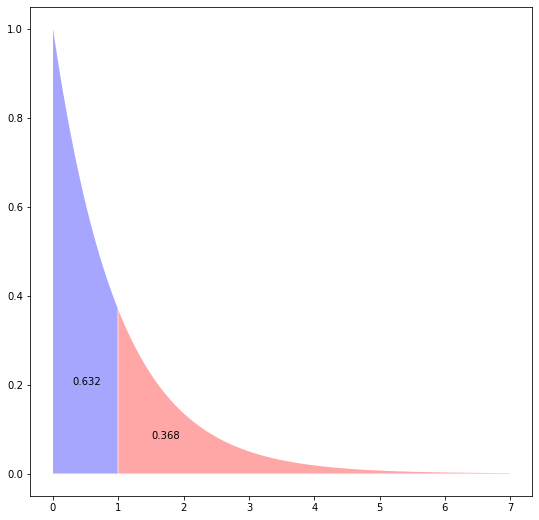

In [21]:
plt.rcParams["figure.figsize"] = (9,9)

plt.fill_between(x=np.arange(0,1,0.01), 
                 y1= stats.expon.pdf(np.arange(0,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,7,0.01), 
                 y1= stats.expon.pdf(np.arange(1,7,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.text(x=0.3, y=0.2, s= round(prob_1,3))
plt.text(x=1.5, y=0.08, s= round(1 - prob_1,3))

## Poisson Distribution
The Poisson distribution models the probability of seeing a certain number of successes within a time interval, where the time it takes for the next success is modeled by an exponential distribution. The Poisson distribution can be used to model the number of arrivals a hospital can expect in a hour's time, the number of emailsone can expect to receive in a day, etc.
The `scipy` name for the Poisson distribution is "poisson". Below is a plot for data from a Poisson distribution with an arrival rate of 1 per time unit:


col_0      0     1     2    3    4   5  6
row_0                                    
counts  3782  3667  1812  564  143  28  4


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

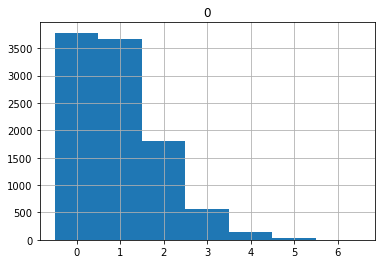

In [22]:
random.seed(12)

arrival_rate_1 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=1 )       # Average arrival time 1

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_1))

%matplotlib inline
# Plot histogram
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5),
                                  bins=max(arrival_rate_1)+1)


The histogram shows that when arrivals are relatively infrequent, it is rare to see more than a couple of arrivals in each time period. 

col_0   0   1   2   3    4    5    6    7     8     9   ...   14   15   16  \
row_0                                                   ...                  
counts   1   8  21  87  175  376  620  895  1114  1217  ...  543  356  226   

col_0    17  18  19  20  21  22  24  
row_0                                
counts  117  90  35  19  11   4   1  

[1 rows x 24 columns]


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

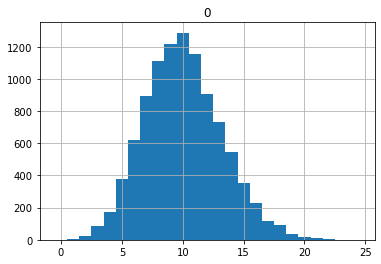

In [23]:
random.seed(12)

arrival_rate_10 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=10 )       # Average arrival time 10

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_10))

# Plot histogram
pd.DataFrame(arrival_rate_10).hist(range=(-0.5,max(arrival_rate_10)+0.5)
                                    , bins=max(arrival_rate_10)+1)


We can use `cdf()` to check the probability of achieving more (or less) than a certain number of successes and `pmf()` to check the probability of obtaining a specific number of successes:

In [24]:
print(stats.poisson.cdf(k=5,     # Check the probability of 5 arrivals or less
                  mu=10))  # With arrival rate 10

print(stats.poisson.pmf(k=10,     # Check the prob f exactly 10 arrivals
                  mu=10))   # With arrival rate 10

0.06708596287903189
0.12511003572113372


Material adapted from:
http://hamelg.blogspot.ca/2015/11/python-for-data-analysis-part-22.html